In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1. Mínimos quadrados para aproximar funções.

---
## a) Regressão linear. Formule o problema de encontrar α e β tais que f (t) = α + βt seja a melhor aproximação em mínimos quadrados para os pontos (ti, bi). Ou seja, dê, em função de ti, bi e m, o sistema de equações que devemos resolver para encontrar α e β.  
Queremos encontrar $ \alpha $ e $\beta$ tal que a função

$$
f(t) = \alpha + \beta t
$$

seja a **melhor aproximação** (no sentido dos **mínimos quadrados**) para os pontos dados $t_i, b_i$ onde $ = 1, 2, \dots, m$

O problema de mínimos quadrados consiste em minimizar o erro total:

$$
E(\alpha, \beta) = \sum_{i=1}^m \left( b_i - (\alpha + \beta t_i) \right)^2
$$

Para minimizar $(\alpha, \beta)$ derivamos em relação a $\alpha$ e $\beta$ e igualamos a zero:

1. Derivando em relação a $alpha$

$$
\frac{\partial E}{\partial \alpha} = -2 \sum_{i=1}^m \left( b_i - (\alpha + \beta t_i) \right) = 0
$$

2. Derivando em relação a $beta$

$$
\frac{\partial E}{\partial \beta} = -2 \sum_{i=1}^m t_i \left( b_i - (\alpha + \beta t_i) \right) = 0
$$

Simplificando essas duas equações:



**Primeira equação:**

$$
m\alpha + \beta \sum_{i=1}^m t_i = \sum_{i=1}^m b_i
\tag{1}
$$



**Segunda equação:**

$$
\alpha \sum_{i=1}^m t_i + \beta \sum_{i=1}^m t_i^2 = \sum_{i=1}^m t_i b_i
\tag{2}
$$



Portanto, o **sistema de equações** que devemos resolver para encontrar $\alpha$ e $\beta$ é:

$$

\begin{aligned}
m\alpha + \left( \sum_{i=1}^m t_i \right) \beta &= \sum_{i=1}^m b_i \\
\left( \sum_{i=1}^m t_i \right) \alpha + \left( \sum_{i=1}^m t_i^2 \right) \beta &= \sum_{i=1}^m t_i b_i
\end{aligned}

$$

$$
\begin{bmatrix}
m & \sum_{i=1}^m t_i \\
\sum_{i=1}^m t_i & \sum_{i=1}^m t_i^2
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
= 
\begin{bmatrix}
\sum_{i=1}^m b_i \\
\sum_{i=1}^m t_i b_i
\end{bmatrix}
$$

$$
\begin{bmatrix}
m & \frac{m+1}{2} \\
\frac{m+1}{2} & \frac{(m+1)(2m + 1)}{6m}
\end{bmatrix}

\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}

= 
\begin{bmatrix}
\sum_{i=1}^m b_i \\
\sum_{i=1}^m t_i b_i
\end{bmatrix}
$$


---

## b) Calcule (numericamente), para vários valores de m, o condicionamento da matriz A correspondente. O que parece acontecer?

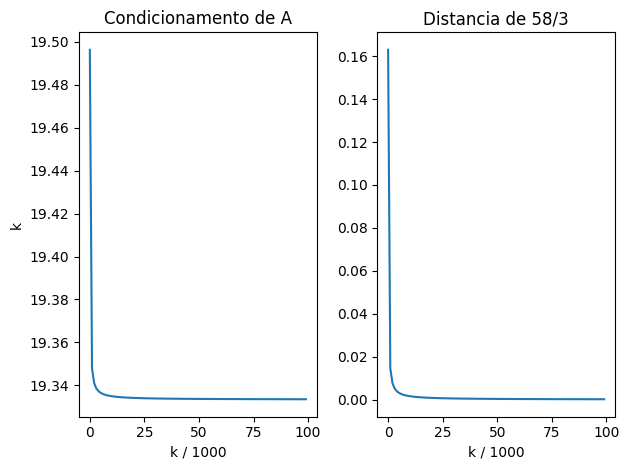

In [4]:
def condicionamento(A):
    A_norm = np.linalg.norm(A)
    A_inv_norm = np.linalg.norm(np.linalg.inv(A))
    k = A_norm * A_inv_norm
    return k

k_s = []
k_s_dif = []
for m in range(100, 100000, 1000):
    A = np.array([
        [m, (m + 1) / 2],
        [(m + 1) / 2, (m + 1)*(2 * m + 1) / (6 * m)]
    ])
    k = condicionamento(A)
    k_s.append(k)
    k_s_dif.append(k - 58/3)
   
plt.subplot(121), plt.plot(k_s), plt.title('Condicionamento de A'), plt.xlabel(f'k / 1000'), plt.ylabel(f'k')
plt.subplot(122), plt.plot(k_s_dif), plt.title('Distancia de 58/3'), plt.xlabel(f'k / 1000')

plt.tight_layout()
plt.show()

Como podemos ver, variando o **$m$** no intervalo [100, 100000] temos que o condicionamento da matriz A tende à $\frac{58}{3}$.

---

## c) Mais regressores. Suponha que, além de funções afins, podemos usar polinômios de grau até n, ou seja, funções da forma $f (t) = α_0 + α_1t + . . . + α_nt^n$. Qual é o sistema que devemos resolver (novamente, em mínimos quadrados) para encontrar os coeficientes αi? 

Queremos uma forma mais geral agora:
$$
\begin{bmatrix}
1 & t_1 & \cdots & t_1^n \\
1 & t_2 & \cdots & t_2^n \\
\vdots & \vdots & \ddots & \vdots \\
1 & t_m & \cdots & t_m^n
\end{bmatrix}
\begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\vdots \\
\alpha_n
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}
$$

Representando de forma vetorial:
$$
T \alpha = b
$$

Agora queremos minimizar o seguinte erro:
$$
E(\alpha) = 
\| b - T\alpha \|_2^2 
$$

$$
\frac{\partial E}{\partial \alpha} = -2T^Tb - 2T^TT\alpha = 0
$$
Portando, o Sistema de equações que resolve $\alpha$ é definido por
$$
T^TT\alpha = T^Tb
$$


---



## d) Escreva uma função poly_ls(m,n) que calcula a matriz A correspondente

A nossa matriz $A$ correspondente será $T^TT$.

In [5]:
def poly_ls_1(m,n):
    T = []
    for i in range(m + 1):
        line = []
        t_i = i/m
        for j in range(n + 1):
            line.append(t_i**j)
        T.append(line)
    T = np.array(T)
    A = T.T@T
    return A

A função retorna um numpy array de dimensão $[n+1]$ x $[n+1]$

---

## e) Fixe m = 100 e faça n crescer até 20. O que acontece com o condicionamento de A?

Fixando $m = 100$ e incrementando $n$ até $20$ podemos analizar o condicionamento da matriz A:

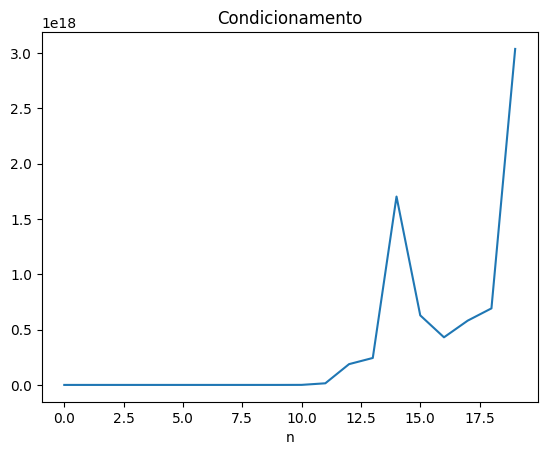

In [6]:
k_s1 = []
m = 100
for n in range(20):
    A = poly_ls_1(m, n)
    k = condicionamento(A)
    k_s1.append(k)
    
k_s1 = np.array(k_s1)
plt.plot(k_s1)
plt.title('Condicionamento')
plt.xlabel('n')
plt.show()

É notório que o condicionamento de $A$ cresce conforme aumentamos o valor de $n$.

---

## f) Centralizando. Use agora $ t_i = \frac{i}{m} − \frac{1}{2} $. Modifique a função poly_ls e compare graficamente os números de condicionamento.

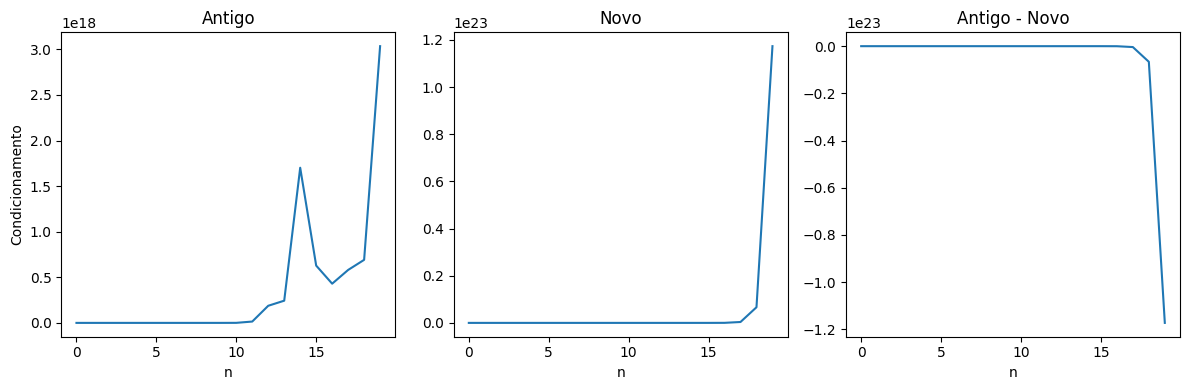

In [7]:
def normalize(x):
    return x / np.linalg.norm(x) 

def poly_ls_2(m,n):
    T = []
    for i in range(m + 1):
        line = []
        t_i = i/m - 1/2
        for j in range(n + 1):
            line.append(t_i**j)
        T.append(line)
    T = np.array(T)
    A = T.T@T
    return A

k_s2 = []
m = 100
for n in range(20):
    A = poly_ls_2(m, n)
    k = condicionamento(A)
    k_s2.append(k)
k_s2 = np.array(k_s2)


dif = k_s1 - k_s2

plt.figure(figsize=(12,4))
plt.subplot(131), plt.plot(k_s1), plt.title('Antigo'), plt.xlabel('n'), plt.ylabel('Condicionamento')
plt.subplot(132), plt.plot(k_s2), plt.title('Novo'), plt.xlabel('n')
plt.subplot(133), plt.plot(dif), plt.title('Antigo - Novo'), plt.xlabel('n')

plt.tight_layout()
plt.show()


É notório que o condicionamento antigo é sempre menor do que o condicionamento novo.

---


# Questão 2. Três algoritmos para mínimos quadrados.

## a) Escreva três funções: ls_qr(A,b), ls_svd(A,b) e ls_normal(A,b) que resolvem o problema de mínimos quadrados Ax = b usando, respectivamente, a fatoração QR de A, a SVD de A, e o sistema de equações normais. As funções devem retornar o vetor dos coeficientes x e o ajuste y = Ax

In [36]:
def ls_qr(A, b):
    Q, R = np.linalg.qr(A)
    Q_ = np.conjugate(Q).T
    projection = Q_ @ b
    x = np.linalg.solve(R, projection)
    return x

def ls_svd(A, b):
    U, E, V_ = np.linalg.svd(A, full_matrices=False)
    E = np.diag(E)
    V = np.conjugate(V_).T
    U_ = np.conjugate(U).T
    projection = U_ @ b
    w = np.linalg.solve(E, projection)
    x = V @ w

    return x

def ls_normal(A, b):
    A_ = np.conjugate(A).T
    projection = A_ @ b
    R = np.linalg.cholesky(A_ @ A)
    R_ = np.conjugate(R).T
    w = np.linalg.solve(R, projection)
    x = np.linalg.solve(R_, w)
    return x


---


## b) Teste os três algoritmos acima para calcular a regressão linear das funções $f (t) = sin t$, $g(t) = e^t$, e $h(t) = cos 3t$, usando 100 pontos igualmente espaçados em [0, 1], e usando a sua função poly_ls. Faça gráficos das funções e das aproximações obtidas. O que você observa?